<a href="https://colab.research.google.com/github/Brynlai/DataScienceHeartDiseaseAssignment/blob/Bryan/DataScienceAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!pip install ucimlrepo
!pip install pandas matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from IPython.display import display, HTML
from scipy.stats import zscore

# CHANGING
# Fetch dataset
heart_disease_bunch = fetch_ucirepo(id=45)

print(heart_disease)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  num  
0        3  0.0   6.0    0  
1        2  3.0   3.0    2  


In [43]:
heart_disease = pd.DataFrame(data=heart_disease_bunch.data.features,
                             columns=heart_disease_bunch.data.feature_names,
                             index=heart_disease_bunch.data.ids)

heart_disease = pd.concat([heart_disease, heart_disease_bunch.data.targets], axis=1)
df = heart_disease
print(df.info())
df = df.rename(columns={'num': 'target'})
print(df.head())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      1

In [44]:
# Create a pandas DataFrame from the features and target variable
# df has rows and columns neatly of the data set
# df = pd.concat([pd.DataFrame(heart_disease.data.features), pd.DataFrame(heart_disease.data.targets, columns=['target'])], axis=1)
print("------ Original df: ",df.head(5))

# Check the data type of the target column
print("Data type of target column:", df.target.dtype) # Use heart_disease instead of df

# If it's not a numerical type (e.g., object), convert it
if not pd.api.types.is_numeric_dtype(df['target']): # Use heart_disease instead of df
  # Assuming the target values represent categories (0 or 1)
  df['target'] = pd.to_numeric(df['target']) # Use heart_disease instead of df

# print("------ Transformed df (if necessary): ",df.head(5))

column_names = {
    "age": "Age",
    "sex": "Gender",
    "cp": "ChestPainType",
    "trestbps": "RestingBP",
    "chol": "SerumCholesterol",
    "fbs": "FastingBloodSugar",
    "restecg": "RestingECG",
    "thalach": "MaxHeartRate",
    "exang": "ExerciseAngina",
    "oldpeak": "OldPeak",
    "slope": "ExerciseSlope",
    "ca": "MajorVessels",
    "thal": "ThalliumStress",
    "target": "HeartDisease"
}
df.rename(columns=column_names, inplace=True) # Use heart_disease instead of df
print("------- Renamed df:",df) # Use heart_disease instead of df

------ Original df:     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  
Data type of target column: int64
------- Renamed df:      Age  Gender  ChestPainType  RestingBP  SerumCholesterol  \
0     63       1              1        145               233   
1     67       1              4        160               286   
2     67       1              4        120               229   
3     37       1              3        130  

In [45]:
print("------- Renamed df:",df.head(5))
# Export the entire DataFrame to a CSV file (including all rows and columns)
# df.to_csv('heart_disease_full.csv', index=False)

------- Renamed df:    Age  Gender  ChestPainType  RestingBP  SerumCholesterol  FastingBloodSugar  \
0   63       1              1        145               233                  1   
1   67       1              4        160               286                  0   
2   67       1              4        120               229                  0   
3   37       1              3        130               250                  0   
4   41       0              2        130               204                  0   

   RestingECG  MaxHeartRate  ExerciseAngina  OldPeak  ExerciseSlope  \
0           2           150               0      2.3              3   
1           2           108               1      1.5              2   
2           2           129               1      2.6              2   
3           0           187               0      3.5              3   
4           2           172               0      1.4              1   

   MajorVessels  ThalliumStress  HeartDisease  
0           0.0   

In [46]:
print(df.describe())

              Age      Gender  ChestPainType   RestingBP  SerumCholesterol  \
count  303.000000  303.000000     303.000000  303.000000        303.000000   
mean    54.438944    0.679868       3.158416  131.689769        246.693069   
std      9.038662    0.467299       0.960126   17.599748         51.776918   
min     29.000000    0.000000       1.000000   94.000000        126.000000   
25%     48.000000    0.000000       3.000000  120.000000        211.000000   
50%     56.000000    1.000000       3.000000  130.000000        241.000000   
75%     61.000000    1.000000       4.000000  140.000000        275.000000   
max     77.000000    1.000000       4.000000  200.000000        564.000000   

       FastingBloodSugar  RestingECG  MaxHeartRate  ExerciseAngina  \
count         303.000000  303.000000    303.000000      303.000000   
mean            0.148515    0.990099    149.607261        0.326733   
std             0.356198    0.994971     22.875003        0.469794   
min             0

In [47]:
# DATA CLEANING : Dealing with duplicate observation
# Check for any duplicate observation
duplicate_rows = df.duplicated()
print("Number of duplicate rows before:", duplicate_rows.sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Check for duplicate rows again
duplicate_rows = df.duplicated()
print("Number of duplicate rows after:", duplicate_rows.sum())

Number of duplicate rows before: 0
Number of duplicate rows after: 0


In [48]:
# DATA CLEANING : Handling missing values
# Check for missing values in each column
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

# Replace missing values with the median of each column
df = df.fillna(df.median())

# Check if there are any missing values left
missing_values_after = df.isnull().sum()

print("Missing values after replacing with medians:")
print(missing_values_after)

Missing values in each column:
Age                  0
Gender               0
ChestPainType        0
RestingBP            0
SerumCholesterol     0
FastingBloodSugar    0
RestingECG           0
MaxHeartRate         0
ExerciseAngina       0
OldPeak              0
ExerciseSlope        0
MajorVessels         4
ThalliumStress       2
HeartDisease         0
dtype: int64
Missing values after replacing with medians:
Age                  0
Gender               0
ChestPainType        0
RestingBP            0
SerumCholesterol     0
FastingBloodSugar    0
RestingECG           0
MaxHeartRate         0
ExerciseAngina       0
OldPeak              0
ExerciseSlope        0
MajorVessels         0
ThalliumStress       0
HeartDisease         0
dtype: int64


Number of outliers in each column:
Age                   0
Gender                0
ChestPainType        23
RestingBP             9
SerumCholesterol      5
FastingBloodSugar    45
RestingECG            0
MaxHeartRate          1
ExerciseAngina        0
OldPeak               5
ExerciseSlope         0
MajorVessels         20
ThalliumStress        0
HeartDisease          0
dtype: int64


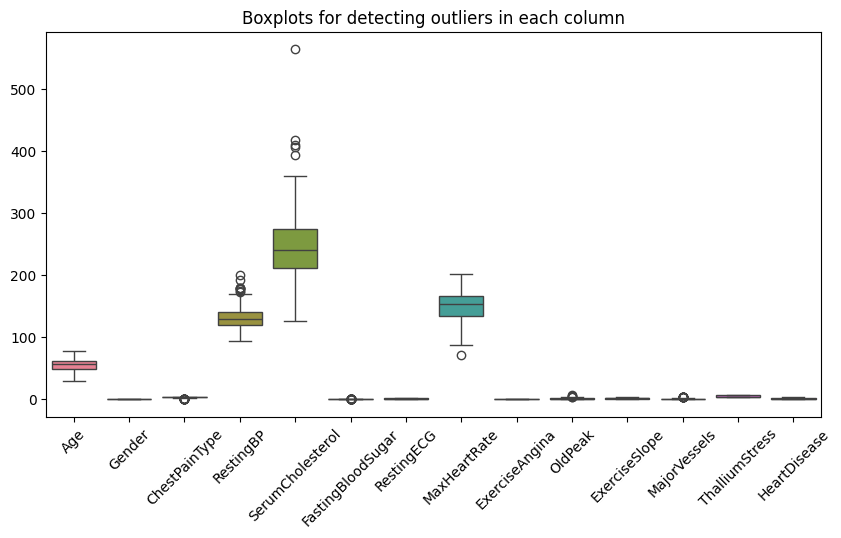

In [49]:
# DATA CLEANING : dealing with outliers
# Calculate IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

print("Number of outliers in each column:")
print(outliers)

# Visualize outliers with boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplots for detecting outliers in each column')
plt.show()

In [50]:
# DATA CLEANING : dealing with outliers
# Identify outliers
outlier_mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Debug: Print the first few rows of the outlier mask
print("Outlier Mask (first few rows):")
print(outlier_mask.head())

# Impute outliers with the median of each column
for column in df.columns:
    if df[column].dtype in [np.int64, np.float64]:  # Check if the column is numerical
        is_outlier = outlier_mask[column]
        if is_outlier.any():
            median_value = df[column].median()
            df.loc[is_outlier, column] = median_value
            print(f"Replaced outliers in column '{column}' with median value {median_value}")

# Check the DataFrame after imputation
print("Data after imputing outliers:")
print(df.head())

# Verify if there are any remaining outliers
remaining_outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Remaining outliers in each column after imputation:")
print(remaining_outliers)


Outlier Mask (first few rows):
     Age  Gender  ChestPainType  RestingBP  SerumCholesterol  \
0  False   False           True      False             False   
1  False   False          False      False             False   
2  False   False          False      False             False   
3  False   False          False      False             False   
4  False   False          False      False             False   

   FastingBloodSugar  RestingECG  MaxHeartRate  ExerciseAngina  OldPeak  \
0               True       False         False           False    False   
1              False       False         False           False    False   
2              False       False         False           False    False   
3              False       False         False           False    False   
4              False       False         False           False    False   

   ExerciseSlope  MajorVessels  ThalliumStress  HeartDisease  
0          False         False           False         False  
1      

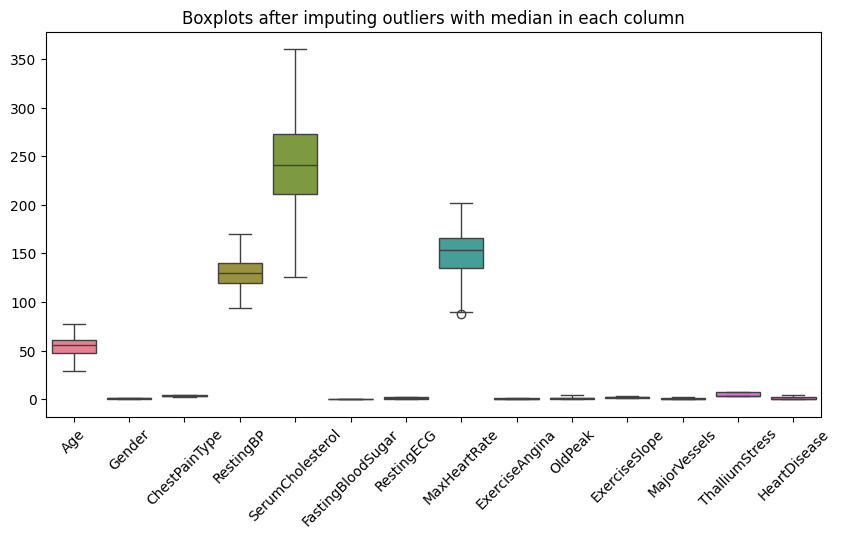

(303, 14)

In [51]:
# DATA CLEANING : dealing with outliers
# Visualize outliers with boxplots after outliers have been imputed with median values
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplots after imputing outliers with median in each column')
plt.show()
df.shape

There exists an outlier in MaxHeartRate variable, but it also lies on where the left whisker ends, which is the minimum value. Thus we leave it as is and consider it as not an outlier, since removing it would distort the data.